Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [91]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate
from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [92]:
UNIVERSE_SIZE = 1000
NUM_SETS = 200
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [93]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)

In [94]:
SETS

array([[False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

## Helper Functions

In [95]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [96]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(31389.64261849826))

In [97]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(16962.6681669001))

## SImple RHMC

In [112]:
def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol
    

In [113]:
#Fitness functioon

def fitness(solution: np.ndarray) :
    return (valid(solution), -cost(solution))

ic| fitness(solution): (np.False_, np.float64(-7613.508783440348))
ic| fitness(solution): (np.False_, np.float64(-0.0))


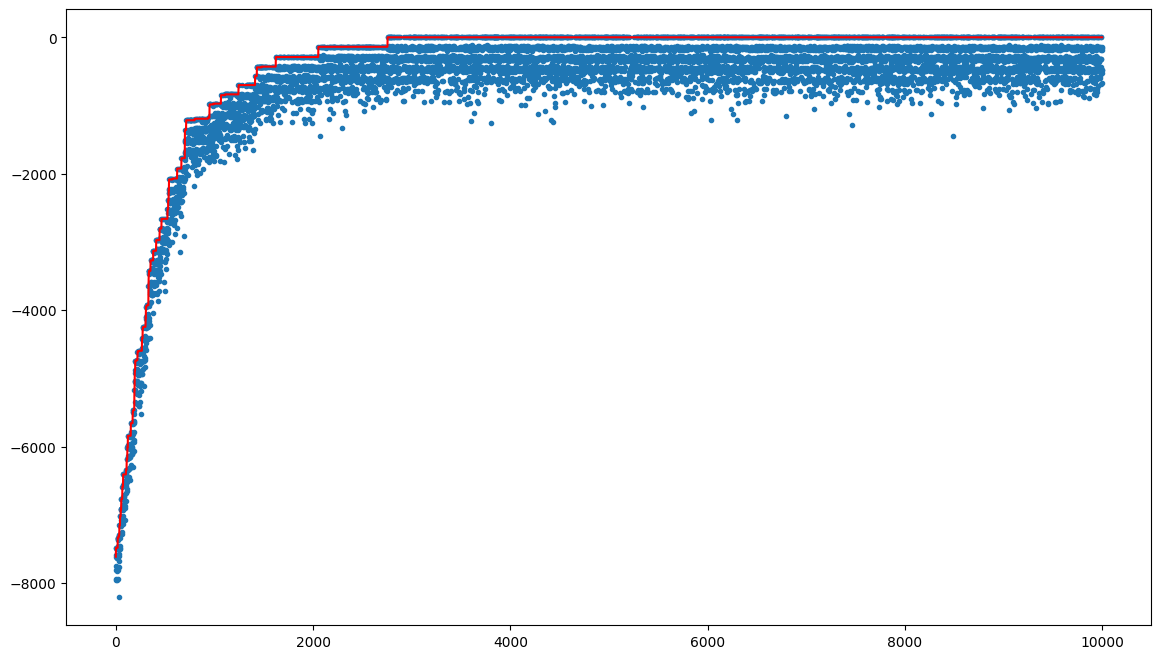

In [116]:
#Hill Climber function 

solution = rng.random(NUM_SETS) < .3 #if less than ..., vector of all true?
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))

tweak = multiple_mutation


for steps in range (10_000):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))

    if f > solution_fitness :
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))

#ic(solution)
ic(fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")